# 속성 데이터 분류 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/car_classification.csv

--2022-01-24 00:32:42--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.003s  

2022-01-24 00:32:42 (15.2 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [3]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)



In [6]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,class
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0


In [7]:
x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [8]:
print(train_x[:5])
print(train_y[:5])

[[-0.41587639  0.30957112  0.05340019 -0.50581452 -0.01481534  0.09376086
   0.54846706]
 [-1.08211534  1.48205303  1.18103289  1.18288491  1.36262341 -0.73991557
  -1.08031391]
 [-0.56962384 -0.86291079 -0.69198413 -0.50581452 -0.78594558  1.0724245
  -0.80885042]
 [-1.59460685  1.48205303  1.48683159  1.96228465  0.80811602 -1.64608561
  -0.80885042]
 [-0.44150097 -0.86291079 -0.51997236 -0.37591457 -0.67057036  1.43489251
  -1.08031391]]
[0. 0. 0. 0. 0.]


In [9]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


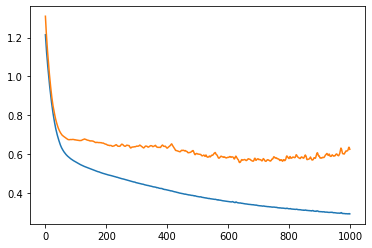

3/3 [==============================] - 0s 4ms/step - loss: 0.6161 - acc: 0.7342
loss= 0.6161051988601685
acc= 0.7341772317886353


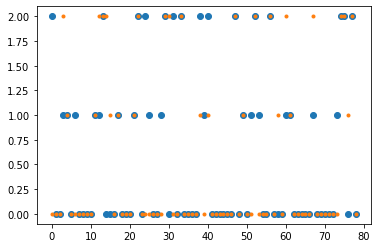

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()